# SDS project

## 1. Data cleaning

In [120]:
#import required libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

from sklearn.preprocessing import MinMaxScaler

### Steps
* Describe data.
* Data cleaning.
* Graph visualization.
* Normalization and Standardization.

In [121]:
#Read dataset, and tell it to take '-' and 0 as null values
data = pd.read_csv('AMEO_dataset.csv' ,
                   na_values=[0,'-'])

In [122]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,NaN,train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,1.0,train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,2.0,train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,3.0,train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,...,-1,-1,-1,-1,-1,NaN,0.3448,-0.3440,-0.40780,-0.9194
4,4.0,train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**Note:** The -1 in subjects indicates student did not take that exam and does not indicate NULL values

In [123]:
print(data.isnull().sum(), end='\n\n')
#Note: CollegeCityTier has 0 as a valid input and it's not considered NULL by us
print('Total number of Missing values is: ', data.isnull().sum().sum()-2797)

Unnamed: 0                  1
Unnamed: 0.1                0
ID                          0
Salary                    379
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage              378
10board                   606
12graduation                0
12percentage              384
12board                   624
CollegeID                   0
CollegeTier                 0
Degree                    291
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEng

## Handling missing values

### Salary column
Let's fill the missing values with **mean salary** for corresponding job positions

In [124]:
for i in range(1,3998):
    col = 'Salary'
    if (pd.isna(data[col][i])):
        designation = data['Designation'][i]
        mean = data[data['Designation']==designation]['Salary'].mean()
        if(not pd.isna(mean)):
            data['Salary'][i] = mean
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [125]:
# print(data.isnull().sum(), end='\n\n')
# #Note: CollegeCityTier has 0 as a valid input and it's not considered NULL by us
# print('Total number of Missing values is: ', data.isnull().sum().sum()-2797)

### 10th percentage and 12th percentage

Fill missing data with the **mean**

In [126]:
data['10percentage'].fillna(data['10percentage'].mean(), inplace=True)
data['12percentage'].fillna(data['10percentage'].mean(), inplace=True)

In [127]:
# print(data.isnull().sum(), end='\n\n')
# #Note: CollegeCityTier has 0 as a valid input and it's not considered NULL by us
# print('Total number of Missing values is: ', data.isnull().sum().sum()-2797)

### 10th and 12th Board

Since data is categorical, fill the missing values with the **mode (most frequent)**

In [128]:
data['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', nan, 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'wbbse',
       'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'karnataka state board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose', 'metric',
       'ms board', 'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal b

In [129]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', nan, 'bseb', 'chse',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'hbse',
       'board of intermediate education', 'ms board', 'pue', 'stateboard',
       'hsc', 'electonincs and com

In [130]:
data['10board'].fillna(str(data['10board'].mode()), inplace=True)
data['12board'].fillna(str(data['12board'].mode()), inplace=True)

### Degree

Same goes for degree. Fill null values with **mode**

In [131]:
print(data['Degree'].mode())

0    B.Tech/B.E.
dtype: object


In [132]:
data['Degree'].fillna('B.Tech/B.E', inplace=True)

In [133]:
# print(data.isnull().sum(), end='\n\n')
# #Note: CollegeCityTier has 0 as a valid input and it's not considered NULL by us
# print('Total number of Missing values is: ', data.isnull().sum().sum()-2797)

### conscientiousness, agreeableness, extraversion 

In [134]:
data['conscientiousness'].fillna(data['conscientiousness'].mean(), inplace=True)
data['agreeableness'].fillna(data['agreeableness'].mean(), inplace=True)
data['extraversion'].fillna(data['extraversion'].mean(), inplace=True)

In [135]:
print(data.isnull().sum(), end='\n\n')
#Note: CollegeCityTier has 0 as a valid input and it's not considered NULL by us
print('Total number of Missing values is: ', data.isnull().sum().sum()-2797)

Unnamed: 0                  1
Unnamed: 0.1                0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEng

### Marks in subjects -> -1 means subject was not taken, therefore we'll replace it with 0

In [136]:
data['ComputerProgramming'].fillna(0)
data['ElectronicsAndSemicon'].fillna(0)
data['ComputerScience'].fillna(0)
data['MechanicalEngg'].fillna(0)
data['ElectricalEngg'].fillna(0)
data['TelecomEngg'].fillna(0)
data['CivilEngg'].fillna(0)

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
3993   -1
3994   -1
3995   -1
3996   -1
3997   -1
Name: CivilEngg, Length: 3998, dtype: int64

### Graduation year

In [137]:
data['GraduationYear'].fillna(float(data['GraduationYear'].mode()), inplace=True)

## 2. Removing useless columns and combining columns

A sub step where we remove/modify unwanted columns to keep data clean and relevant.

In [138]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Salary', 'DOJ', 'DOL',
       'Designation', 'JobCity', 'Gender', 'DOB', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [139]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'DOL', 'CollegeID', 'CollegeCityID','CollegeCityTier','Domain'], axis=1, inplace=True)

In [140]:
data.columns

Index(['Salary', 'DOJ', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   Designation            3998 non-null   object 
 3   JobCity                3998 non-null   object 
 4   Gender                 3998 non-null   object 
 5   DOB                    3998 non-null   object 
 6   10percentage           3998 non-null   float64
 7   10board                3998 non-null   object 
 8   12graduation           3998 non-null   int64  
 9   12percentage           3998 non-null   float64
 10  12board                3998 non-null   object 
 11  CollegeTier            3998 non-null   int64  
 12  Degree                 3998 non-null   object 
 13  Specialization         3998 non-null   object 
 14  collegeGPA             3998 non-null   float64
 15  Coll

## Making data more readable

### States

In [142]:
data['CollegeState'].unique()
#All data seems readable

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

### JobCity - {cleaning up and managing missing values}

In [143]:
print(data['JobCity'].unique())
print(len(data['JobCity'].unique()))
#We can see that there are redundant names. Let's fix that manually cause I have no idea how tf to do it pandas

['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' '-1' 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Bankura' 'Bengaluru' 'Mysore ' 'Kanpur '
 'jaipur' 'Gurgaon ' 'bangalore' 'CHENNAI' 'Vijayawada' 'Kochi' 'Beawar'
 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri ' 'raipur' 'gurgaon' 'Bhopal'
 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur' 'Kolkata`' 'Bulandshahar'
 'Haridwar' 'Raigarh' 'Visakhapatnam' 'Jabalpur' 'hyderabad' 'Unnao'
 'KOLKATA' 'Than

In [144]:
data['JobCity'] = data['JobCity'].str.lower()
data['JobCity'] = data['JobCity'].str.strip()

In [145]:
print(data['JobCity'].unique())
print(len(data['JobCity'].unique()))

['bangalore' 'indore' 'chennai' 'gurgaon' 'manesar' 'hyderabad' 'banglore'
 'noida' 'kolkata' 'pune' '-1' 'mohali' 'jhansi' 'delhi' 'bhubaneswar'
 'navi mumbai' 'mumbai' 'new delhi' 'mangalore' 'rewari' 'gaziabaad'
 'bhiwadi' 'mysore' 'rajkot' 'greater noida' 'jaipur' 'thane'
 'maharajganj' 'thiruvananthapuram' 'punchkula' 'bhubaneshwar'
 'coimbatore' 'dhanbad' 'lucknow' 'trivandrum' 'gandhi nagar' 'una'
 'daman and diu' 'gurgoan' 'vsakhapttnam' 'nagpur' 'bhagalpur'
 'new delhi - jaisalmer' 'ahmedabad' 'kochi/cochin' 'bankura' 'bengaluru'
 'kanpur' 'vijayawada' 'kochi' 'beawar' 'alwar' 'siliguri' 'raipur'
 'bhopal' 'faridabad' 'jodhpur' 'udaipur' 'muzaffarpur' 'kolkata`'
 'bulandshahar' 'haridwar' 'raigarh' 'visakhapatnam' 'jabalpur' 'unnao'
 'aurangabad' 'belgaum' 'dehradun' 'rudrapur' 'jamshedpur' 'vizag' 'nouda'
 'dharamshala' 'banagalore' 'hissar' 'ranchi' 'madurai' 'gurga'
 'chandigarh' 'australia' 'cheyyar' 'sonepat' 'ghaziabad' 'pantnagar'
 'jagdalpur' 'angul' 'baroda' 'ariyalur

In [146]:
temp_d = {'bangalore': 'bangalore',
 'indore': 'indore',
 'chennai': 'chennai',
 'gurgaon': 'gurgaon',
 'manesar': 'manesar',
 'hyderabad': 'hyderabad',
 'banglore': 'bangalore',
 'noida': 'noida',
 'kolkata': 'kolkata',
 'pune': 'pune',
 'nan': 'bangalore',
 'mohali': 'mohali',
 'jhansi': 'jhansi',
 'delhi': 'delhi',
 'bhubaneswar': 'bhubaneswar',
 'navi mumbai': 'mumbai',
 'mumbai': 'mumbai',
 'new delhi': 'delhi',
 'mangalore': 'mangalore',
 'rewari': 'rewari',
 'gaziabaad': 'gaziabaad',
 'bhiwadi': 'bhiwadi',
 'mysore': 'mysore',
 'rajkot': 'rajkot',
 'greater noida': 'greater noida',
 'jaipur': 'jaipur',
 'thane': 'thane',
 'maharajganj': 'maharajganj',
 'thiruvananthapuram': 'thiruvananthapuram',
 'punchkula': 'punchkula',
 'bhubaneshwar': 'bhubaneswar',
 'coimbatore': 'coimbatore',
 'dhanbad': 'dhanbad',
 'lucknow': 'lucknow',
 'trivandrum': 'thiruvananthapuram',
 'gandhi nagar': 'gandhinagar',
 'una': 'una',
 'daman and diu': 'daman and diu',
 'gurgoan': 'gurgaon',
 'vsakhapttnam': 'vishakapatnam',
 'nagpur': 'nagpur',
 'bhagalpur': 'bhagalpur',
 'new delhi - jaisalmer': 'delhi',
 'ahmedabad': 'ahmedabad',
 'kochi/cochin': 'kochi',
 'bankura': 'bankura',
 'bengaluru': 'bangalore',
 'kanpur': 'kanpur',
 'vijayawada': 'vijayawada',
 'kochi': 'kochi',
 'beawar': 'beawar',
 'alwar': 'alwar',
 'siliguri': 'siliguri',
 'raipur': 'raipur',
 'bhopal': 'bhopal',
 'faridabad': 'faridabad',
 'jodhpur': 'jodhpur',
 'udaipur': 'udaipur',
 'muzaffarpur': 'muzaffarpur',
 'kolkata`': 'kolkata',
 'bulandshahar': 'bulandshahar',
 'haridwar': 'haridwar',
 'raigarh': 'raigarh',
 'visakhapatnam': 'vishakapatnam',
 'jabalpur': 'jabalpur',
 'unnao': 'unnao',
 'aurangabad': 'aurangabad',
 'belgaum': 'belgaum',
 'dehradun': 'dehradun',
 'rudrapur': 'rudrapur',
 'jamshedpur': 'jamshedpur',
 'vizag': 'vishakapatnam',
 'nouda': 'noida',
 'dharamshala': 'dharamshala',
 'banagalore': 'bangalore',
 'hissar': 'hissar',
 'ranchi': 'ranchi',
 'madurai': 'madurai',
 'gurga': 'gurgaon',
 'chandigarh': 'chandigarh',
 'australia': 'bangalore',
 'cheyyar': 'cheyyar',
 'sonepat': 'sonepat',
 'ghaziabad': 'ghaziabad',
 'pantnagar': 'pantnagar',
 'jagdalpur': 'jagdalpur',
 'angul': 'angul',
 'baroda': 'baroda',
 'ariyalur': 'ariyalur',
 'jowai': 'jowai',
 'kochi/cochin, chennai and coimbatore': 'kochi',
 'neemrana': 'neemrana',
 'tirupathi': 'tirupathi',
 'bhubneshwar': 'bhubaneswar',
 'calicut': 'calicut',
 'gandhinagar': 'gandhinagar',
 'dubai': 'dubai',
 'ahmednagar': 'ahmednagar',
 'nashik': 'nashik',
 'bellary': 'bellary',
 'ludhiana': 'ludhiana',
 'muzaffarnagar': 'muzaffarnagar',
 'gagret': 'gagret',
 'indirapuram, ghaziabad': 'ghaziabad',
 'gwalior': 'gwalior',
 'chennai & mumbai': 'chennai',
 'rajasthan': 'rajasthan',
 'sonipat': 'sonipat',
 'bareli': 'bareli',
 'hospete': 'hospete',
 'miryalaguda': 'miryalaguda',
 'dharuhera': 'dharuhera',
 'meerut': 'meerut',
 'ganjam': 'ganjam',
 'hubli': 'hubli',
 'ncr': 'delhi',
 'agra': 'agra',
 'trichy': 'trichy',
 'kudankulam ,tarapur': 'tarapur',
 'ongole': 'ongole',
 'sambalpur': 'sambalpur',
 'pondicherry': 'pondicherry',
 'bundi': 'bundi',
 'sadulpur,rajgarh,distt-churu,rajasthan': 'rajgarh',
 'am': 'bangalore',
 'bikaner': 'bikaner',
 'vadodara': 'vadodara',
 'india': 'delhi',
 'asansol': 'asansol',
 'tirunelvelli': 'tirunelveli',
 'ernakulam': 'ernakulam',
 'bilaspur': 'bilaspur',
 'chandrapur': 'chandrapur',
 'nanded': 'nanded',
 'dharmapuri': 'dharmapuri',
 'vandavasi': 'vandavasi',
 'rohtak': 'rohtak',
 'patna': 'patna',
 'salem': 'salem',
 'nasikcity': 'nasikcity',
 'technopark, trivandrum': 'thiruvananthapuram',
 'bharuch': 'bharuch',
 'tornagallu': 'tornagallu',
 'jaspur': 'jaspur',
 '-1':'bangalore',
 'burdwan': 'burdwan',
 'shimla': 'shimla',
 'gajiabaad': 'gajiabaad',
 'jammu': 'jammu',
 'shahdol': 'shahdol',
 'muvattupuzha': 'muvattupuzha',
 'al jubail,saudi arabia': 'dubai',
 'kalmar, sweden': 'kalmar',
 'secunderabad': 'secunderabad',
 'a-64,sec-64,noida': 'noida',
 'ratnagiri': 'ratnagiri',
 'jhajjar': 'jhajjar',
 'gulbarga': 'gulbarga',
 'hyderabad(bhadurpally)': 'hyderabad',
 'nalagarh': 'nalagarh',
 'jeddah saudi arabia': 'dubai',
 'chennai, bangalore': 'chennai',
 'jamnagar': 'jamnagar',
 'tirupati': 'tirupati',
 'gonda': 'gonda',
 'orissa': 'orissa',
 'kharagpur': 'kharagpur',
 'navi mumbai , hyderabad': 'mumbai',
 'joshimath': 'joshimath',
 'bathinda': 'bathinda',
 'johannesburg': 'johannesburg',
 'kala amb': 'kala amb',
 'karnal': 'karnal',
 'london': 'london',
 'kota': 'kota',
 'panchkula': 'panchkula',
 'baddi hp': 'baddi',
 'nagari': 'nagari',
 'mettur, tamil nadu': 'mettur',
 'durgapur': 'durgapur',
 'pondi': 'pondicherry',
 'surat': 'surat',
 'kurnool': 'kurnool',
 'kolhapur': 'kolhapur',
 'bhilai': 'bhilai',
 'hderabad': 'hyderabad',
 'bahadurgarh': 'bahadurgarh',
 'rayagada, odisha': 'rayagada',
 'kakinada': 'kakinada',
 'varanasi': 'varanasi',
 'punr': 'pune',
 'nellore': 'nellore',
 'sahibabad': 'sahibabad',
 'howrah': 'howrah',
 'trichur': 'trichur',
 'ambala': 'ambala',
 'khopoli': 'khopoli',
 'keral': 'kerala',
 'roorkee': 'roorkee',
 'allahabad': 'allahabad',
 'delhi/ncr': 'delhi',
 'jalandhar': 'jalandhar',
 'vapi': 'vapi',
 'pilani': 'pilani',
 'muzzafarpur': 'muzzafarpur',
 'ras al khaimah': 'dubai',
 'bihar': 'bihar',
 'singaruli': 'singaruli',
 'pondy': 'pondicherry',
 'phagwara': 'phagwara',
 'guragaon': 'guragaon',
 'baripada': 'baripada',
 'yamuna nagar': 'yamuna nagar',
 'shahibabad': 'shahibabad',
 'sampla': 'sampla',
 'guwahati': 'guwahati',
 'rourkela': 'rourkela',
 'banaglore': 'bangalore',
 'vellore': 'vellore',
 'dausa': 'dausa',
 'latur (maharashtra )': 'latur',
 'mainpuri': 'mainpuri',
 'dammam': 'dammam',
 'haldia': 'haldia',
 'rae bareli': 'rae bareli',
 'patiala': 'patiala',
 'gorakhpur': 'gorakhpur',
 'new dehli': 'delhi',
 'ambala city': 'ambala',
 'karad': 'karad',
 'rajpura': 'rajpura',
 'haryana': 'haryana',
 'asifabadbanglore': 'bangalore'}

In [147]:
temp_d

{'bangalore': 'bangalore',
 'indore': 'indore',
 'chennai': 'chennai',
 'gurgaon': 'gurgaon',
 'manesar': 'manesar',
 'hyderabad': 'hyderabad',
 'banglore': 'bangalore',
 'noida': 'noida',
 'kolkata': 'kolkata',
 'pune': 'pune',
 'nan': 'bangalore',
 'mohali': 'mohali',
 'jhansi': 'jhansi',
 'delhi': 'delhi',
 'bhubaneswar': 'bhubaneswar',
 'navi mumbai': 'mumbai',
 'mumbai': 'mumbai',
 'new delhi': 'delhi',
 'mangalore': 'mangalore',
 'rewari': 'rewari',
 'gaziabaad': 'gaziabaad',
 'bhiwadi': 'bhiwadi',
 'mysore': 'mysore',
 'rajkot': 'rajkot',
 'greater noida': 'greater noida',
 'jaipur': 'jaipur',
 'thane': 'thane',
 'maharajganj': 'maharajganj',
 'thiruvananthapuram': 'thiruvananthapuram',
 'punchkula': 'punchkula',
 'bhubaneshwar': 'bhubaneswar',
 'coimbatore': 'coimbatore',
 'dhanbad': 'dhanbad',
 'lucknow': 'lucknow',
 'trivandrum': 'thiruvananthapuram',
 'gandhi nagar': 'gandhinagar',
 'una': 'una',
 'daman and diu': 'daman and diu',
 'gurgoan': 'gurgaon',
 'vsakhapttnam': 'vis

In [148]:
for i in data['JobCity']:
    try:
        data['JobCity'].replace(i,temp_d[i],inplace=True)
    except:
        pass

In [149]:
print(data['JobCity'].unique())
print(len(data['JobCity'].unique()))

['bangalore' 'indore' 'chennai' 'gurgaon' 'manesar' 'hyderabad' 'noida'
 'kolkata' 'pune' 'mohali' 'jhansi' 'delhi' 'bhubaneswar' 'mumbai'
 'mangalore' 'rewari' 'gaziabaad' 'bhiwadi' 'mysore' 'rajkot'
 'greater noida' 'jaipur' 'thane' 'maharajganj' 'thiruvananthapuram'
 'punchkula' 'coimbatore' 'dhanbad' 'lucknow' 'gandhinagar' 'una'
 'daman and diu' 'vishakapatnam' 'nagpur' 'bhagalpur' 'ahmedabad' 'kochi'
 'bankura' 'kanpur' 'vijayawada' 'beawar' 'alwar' 'siliguri' 'raipur'
 'bhopal' 'faridabad' 'jodhpur' 'udaipur' 'muzaffarpur' 'bulandshahar'
 'haridwar' 'raigarh' 'jabalpur' 'unnao' 'aurangabad' 'belgaum' 'dehradun'
 'rudrapur' 'jamshedpur' 'dharamshala' 'hissar' 'ranchi' 'madurai'
 'chandigarh' 'cheyyar' 'sonepat' 'ghaziabad' 'pantnagar' 'jagdalpur'
 'angul' 'baroda' 'ariyalur' 'jowai' 'neemrana' 'tirupathi' 'calicut'
 'dubai' 'ahmednagar' 'nashik' 'bellary' 'ludhiana' 'muzaffarnagar'
 'gagret' 'gwalior' 'rajasthan' 'sonipat' 'bareli' 'hospete' 'miryalaguda'
 'dharuhera' 'meerut' 'g

In [150]:
data.to_csv('kindoffinalDataset.csv')

In [151]:
df = pd.read_csv('kindoffinalDataset.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [153]:
df.isnull().sum()

Unnamed: 0               0
Salary                   0
DOJ                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

## Graphing the data

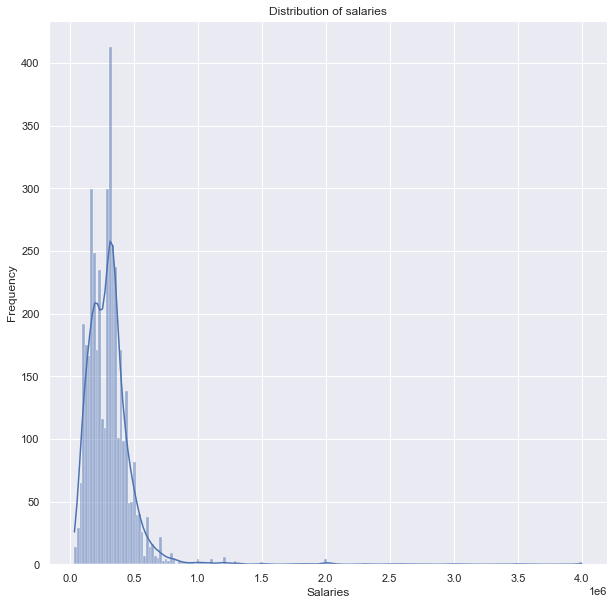

In [154]:
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Distribution of salaries')
sns.histplot(df['Salary'], kde=True)
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("dark")
plt.show()

Salary data seems to be right tailed distribution with a few outliers.

#### Box plot

C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary'>

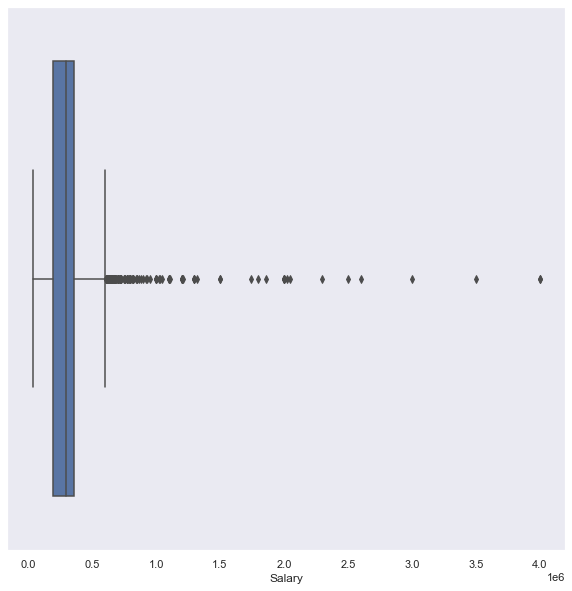

In [155]:
sns.boxplot('Salary',data=df)

In [156]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Salary'] >= Q1 - 1.5 * IQR) & (df['Salary'] <= Q3 + 1.5 *IQR)
newcsv=df.loc[filter]
df = newcsv

C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary'>

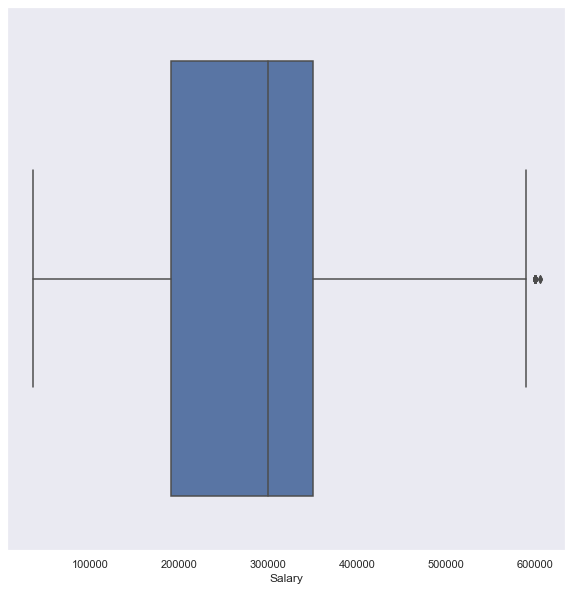

In [157]:
sns.boxplot('Salary',data=df)

## Standardization and Normalization

In [158]:
df.columns

Index(['Unnamed: 0', 'Salary', 'DOJ', 'Designation', 'JobCity', 'Gender',
       'DOB', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

'Salary','10percentage','12percentage','English','Logical','Quant','ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',

#### Factor plot
Comparing mean salary based on Gender

C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


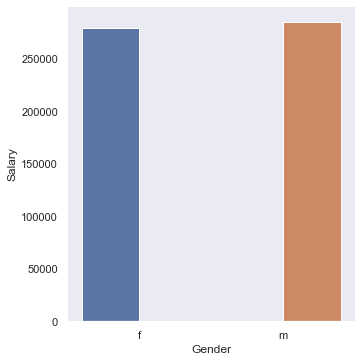

In [159]:
sns. factorplot(x="Gender",y="Salary",hue="Gender",data=df,kind='bar',ci=None)
plt.show()

#### Frequency plot 
Job designations

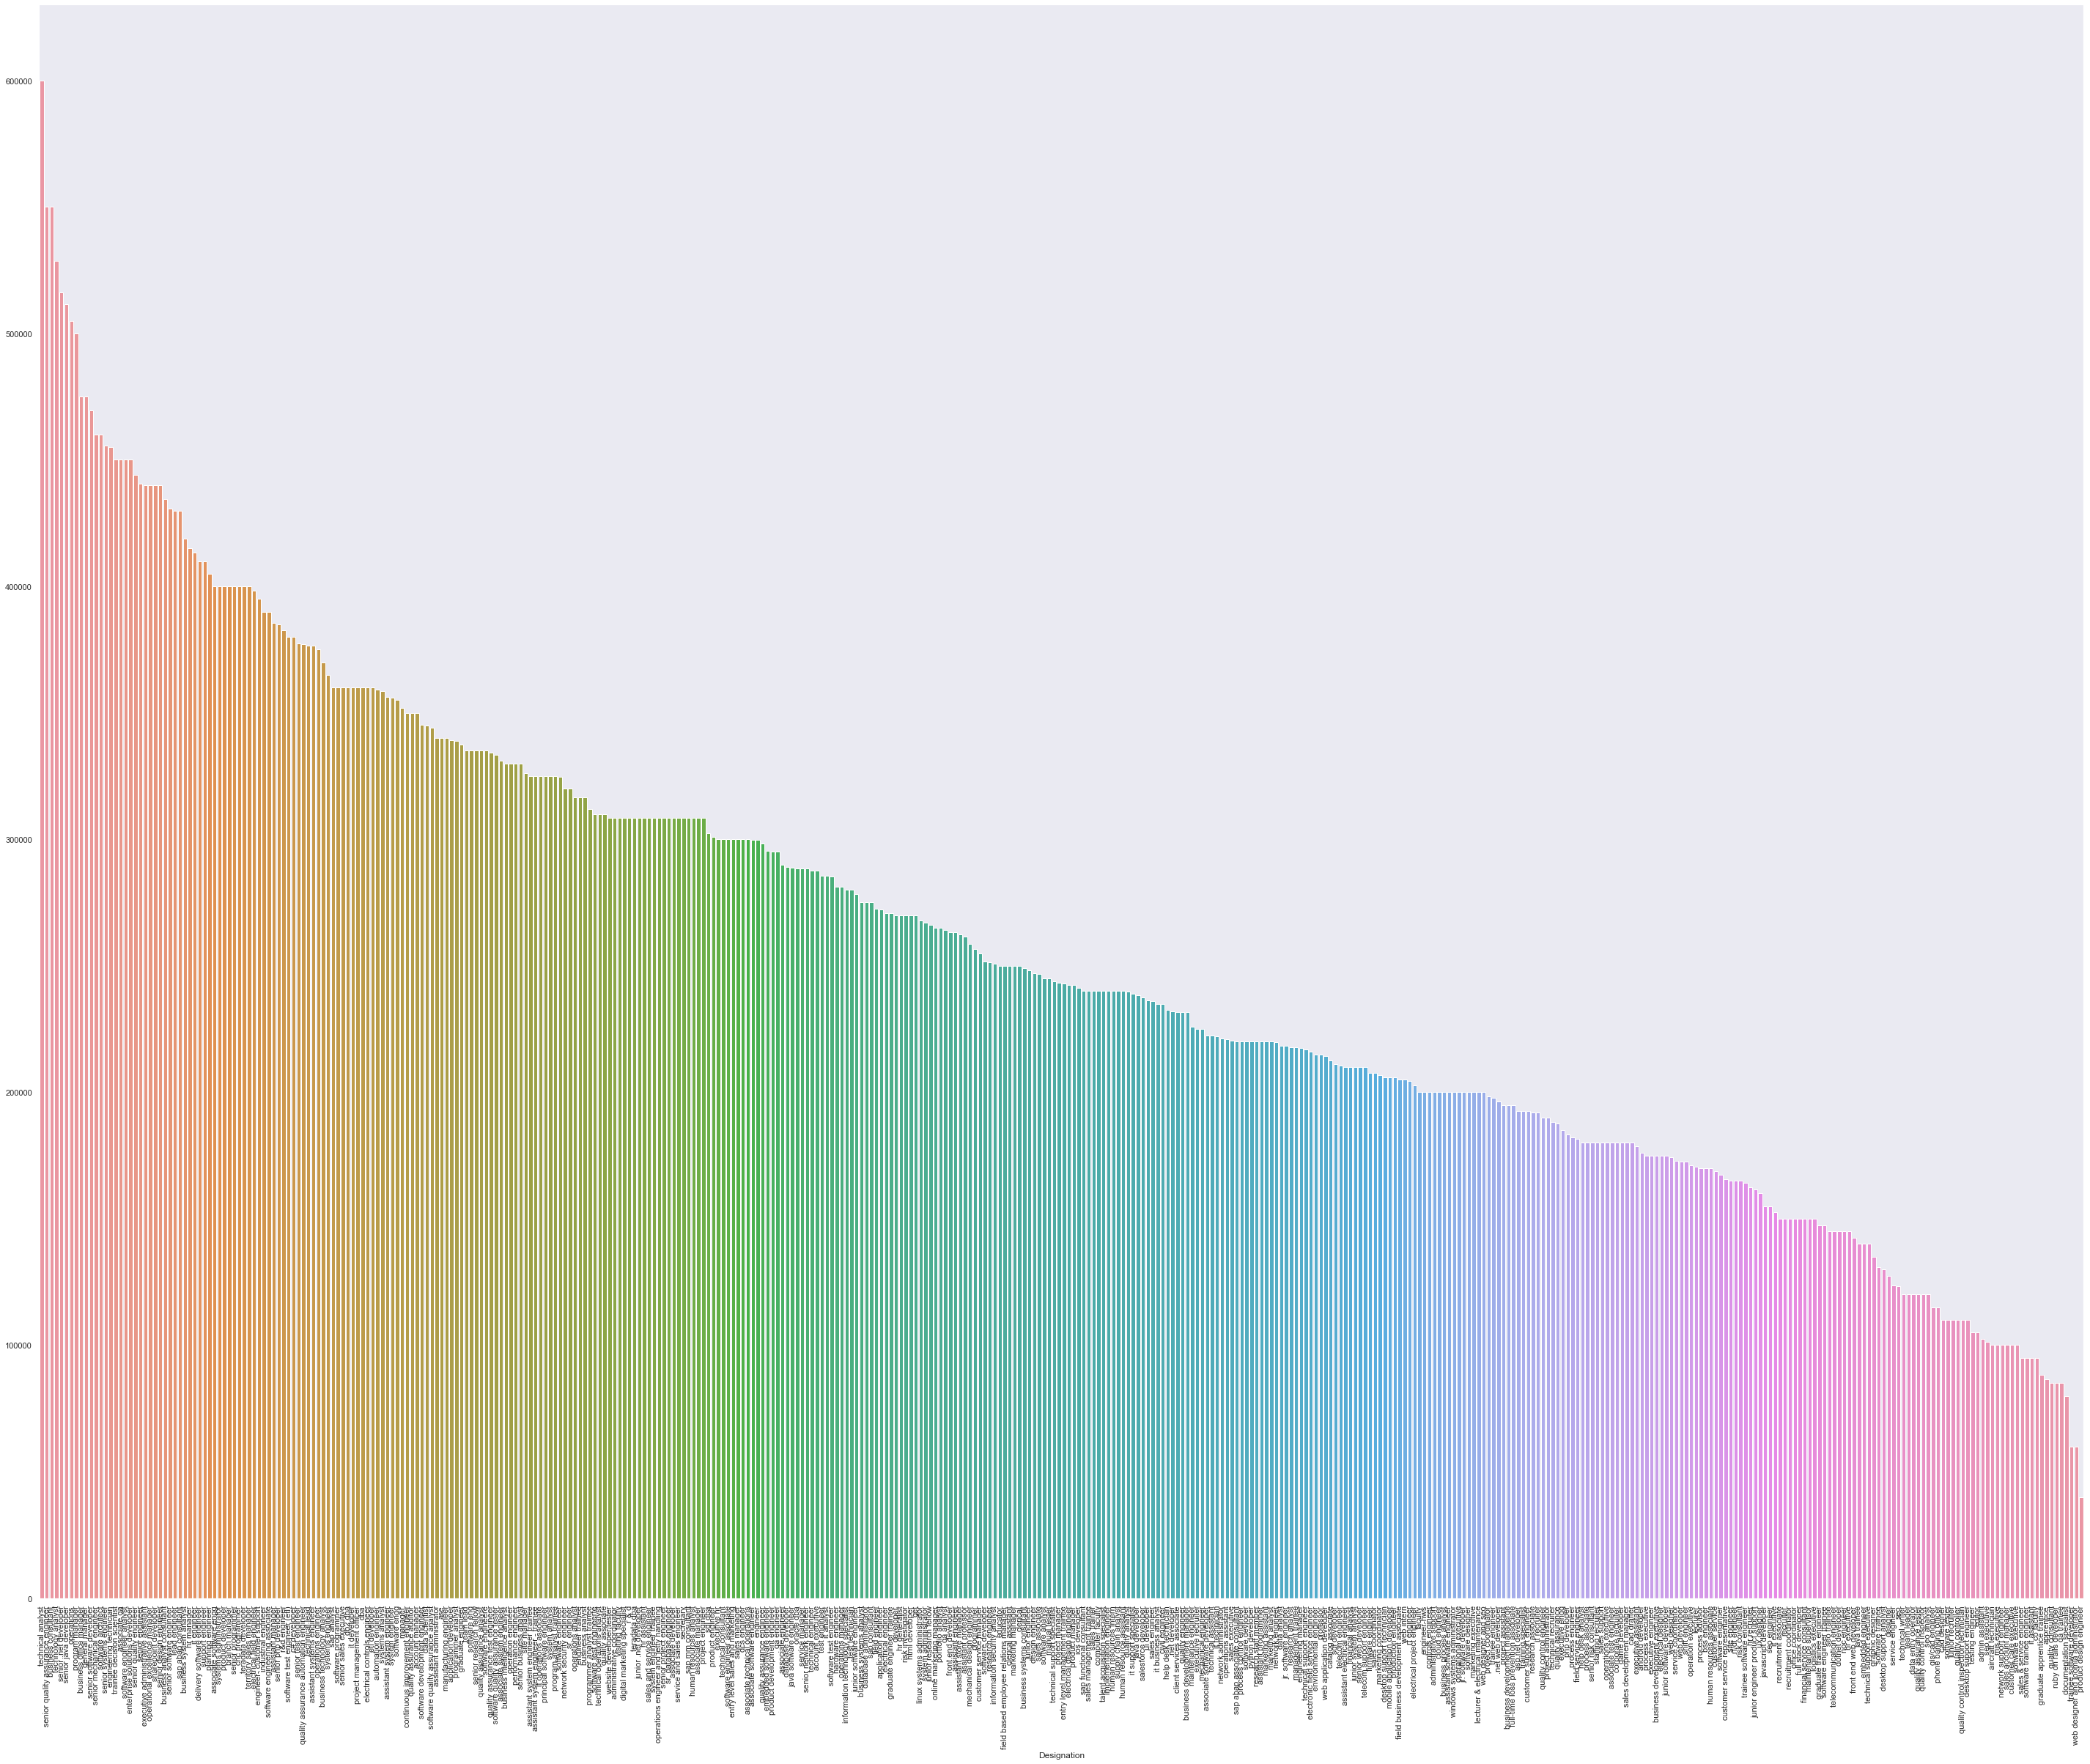

In [160]:
plt.figure(figsize=(50,40))
plt.xticks(rotation = 90)
df_ = df.groupby("Designation")['Salary'].apply(np.mean)
df_ = df_.sort_values(ascending = False)
sns.barplot(x = df_.index, y = df_.values );

For Job Cities

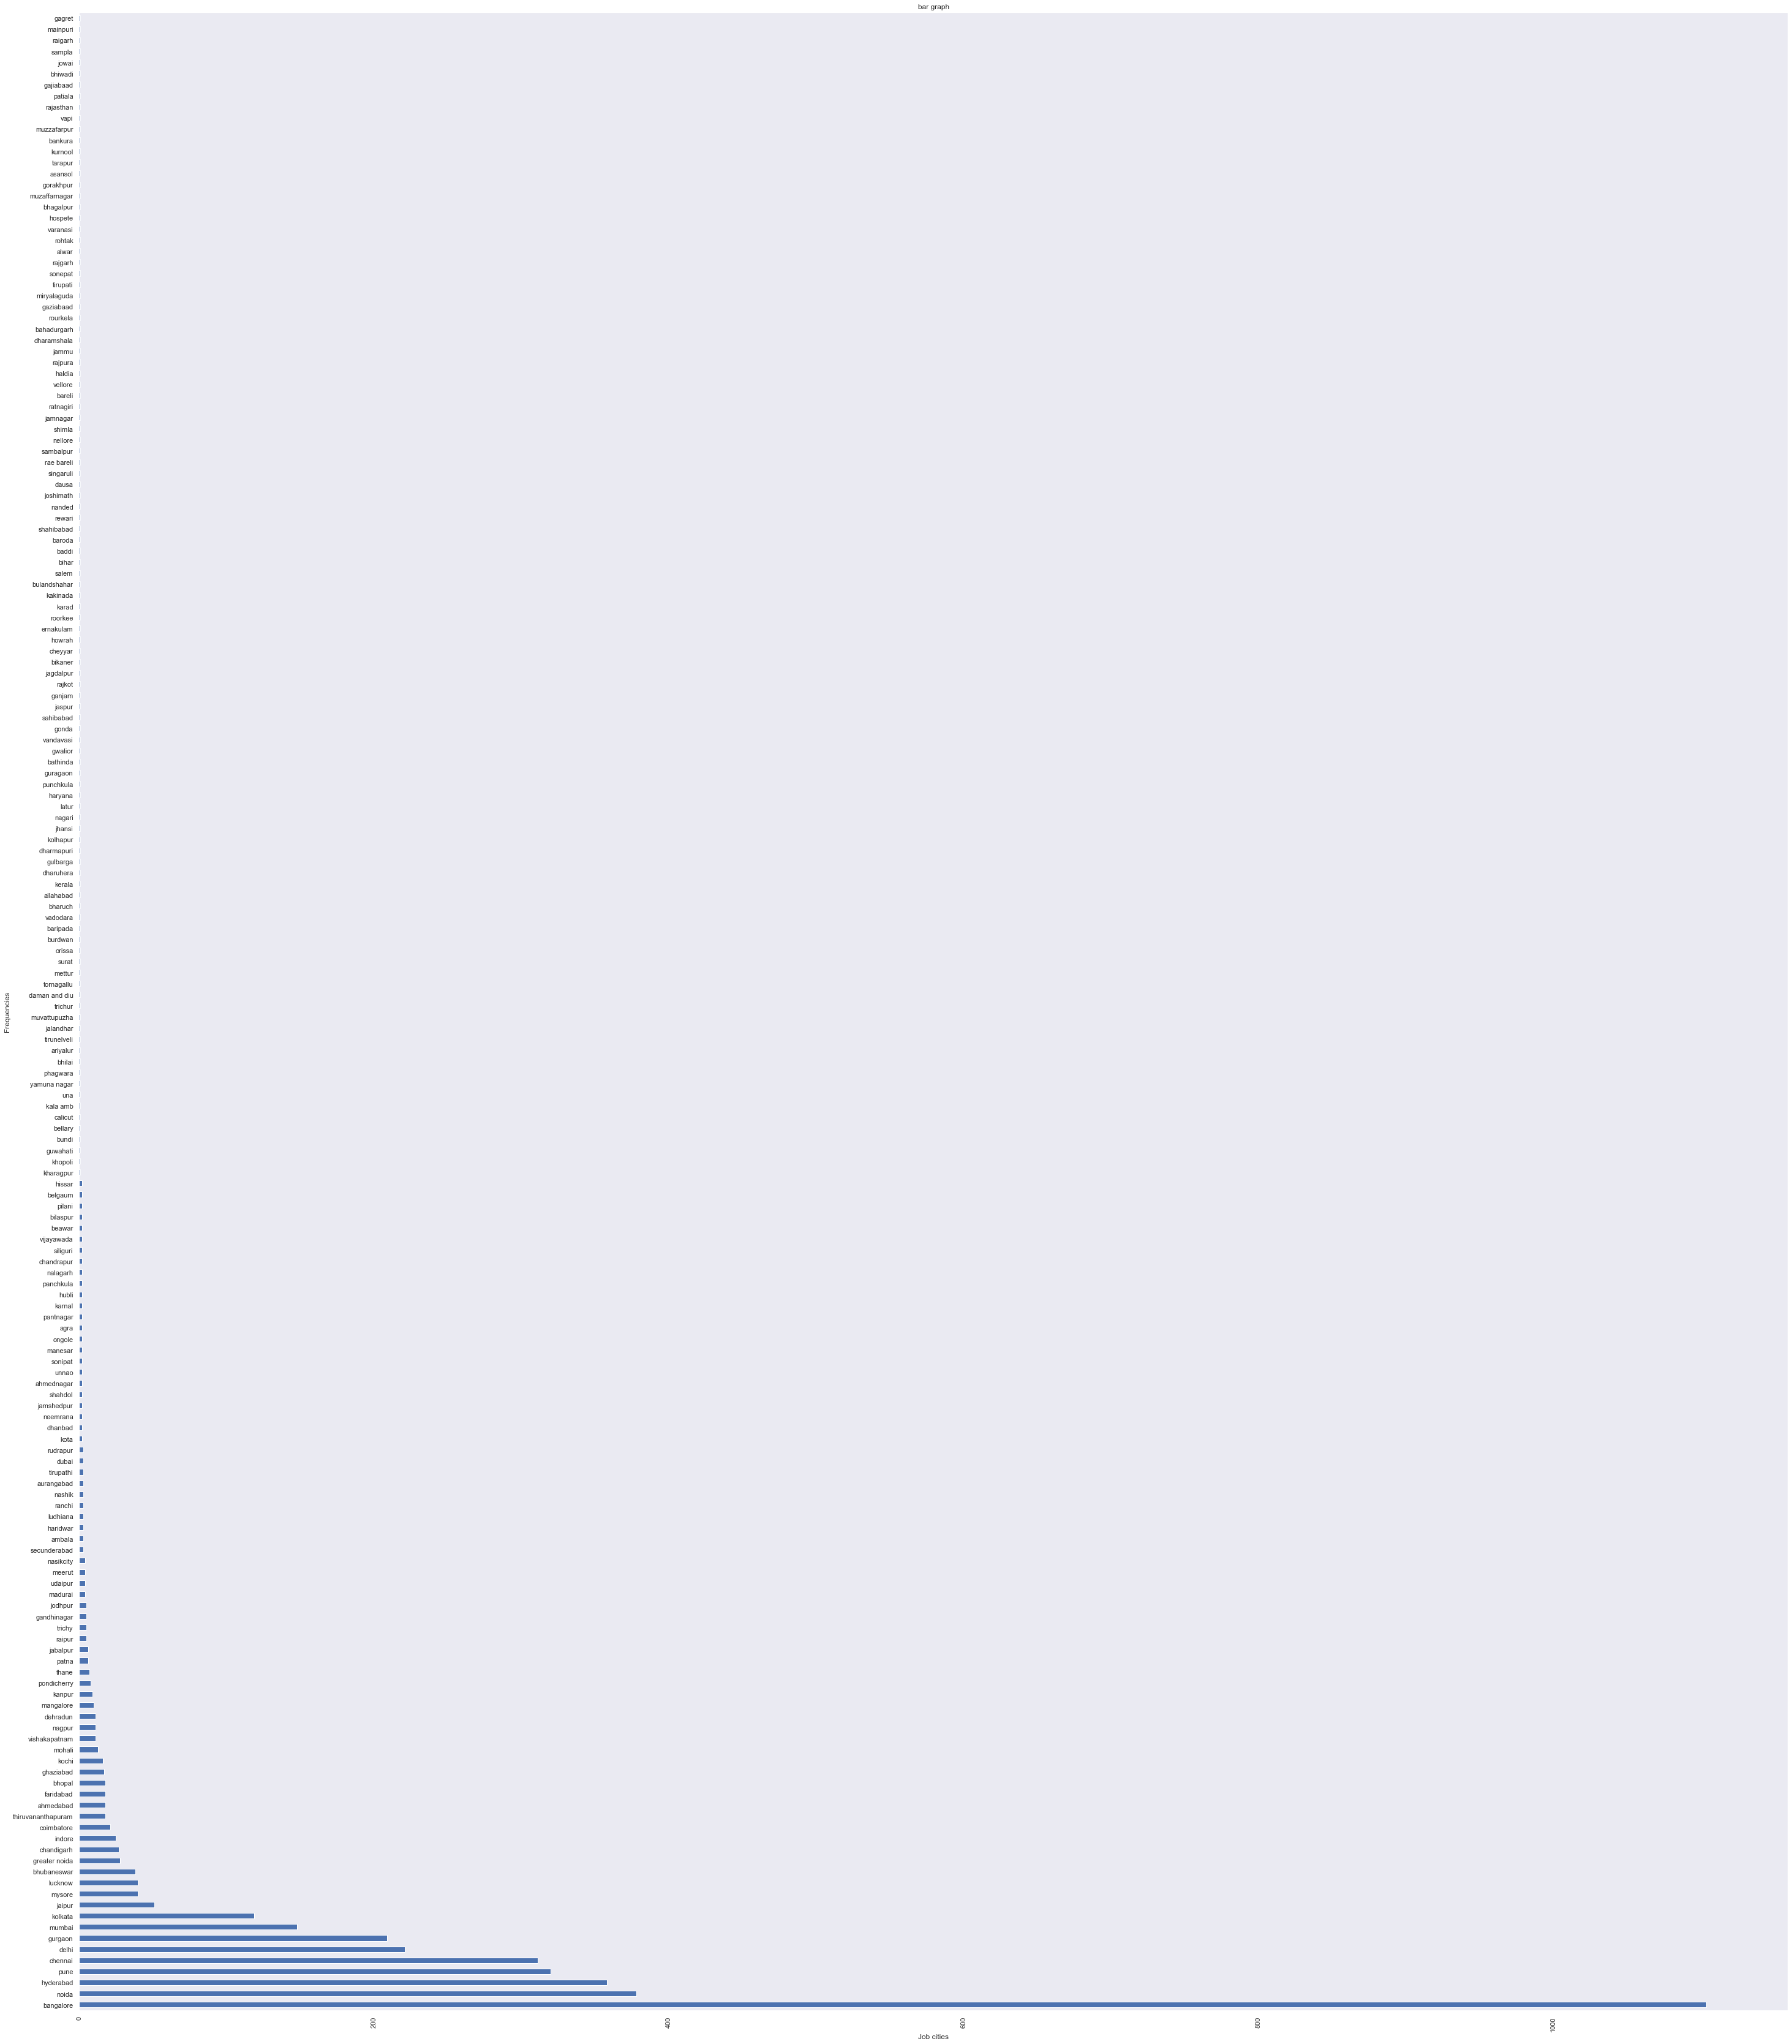

In [161]:
plt.figure(figsize=(50,60))
plt.xticks(rotation=90)
df.JobCity.value_counts().plot(kind='barh')
plt.title("bar graph")
plt.xlabel('Job cities')
plt.ylabel('Frequencies')
plt.show()

#### Scatter plot
Relationship between the personality trait - Openess to experience vs Salary

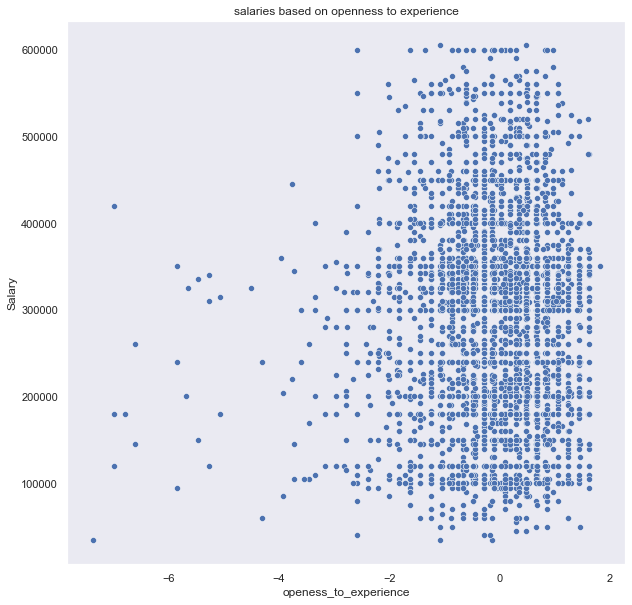

In [162]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=0)
sns.scatterplot(data=df, y='Salary', x='openess_to_experience')
plt.title("salaries based on openness to experience")
plt.show()

From the above graph we can confidently say that, while there is no strong relationship between openess to experience and salary, it must depend on other factors, like cgpa, logic and so on

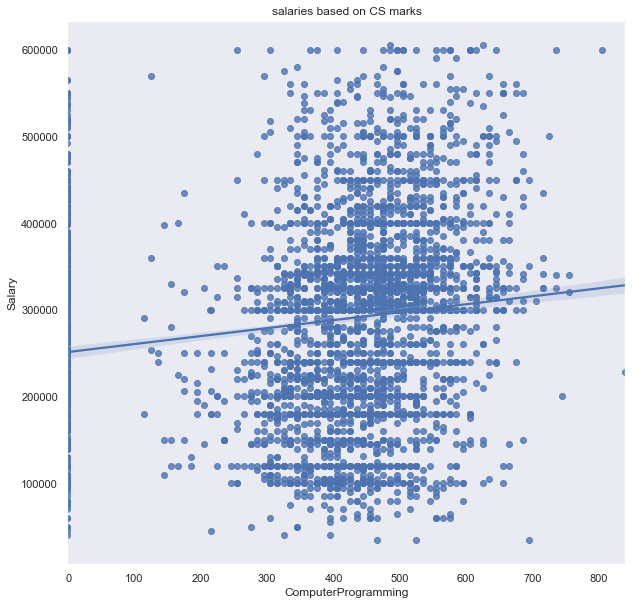

In [163]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=0)
df_ = df[df['ComputerProgramming'].notnull()]
sns.regplot(data=df_, y='Salary', x='ComputerProgramming')
plt.title("salaries based on CS marks")
plt.show()


<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

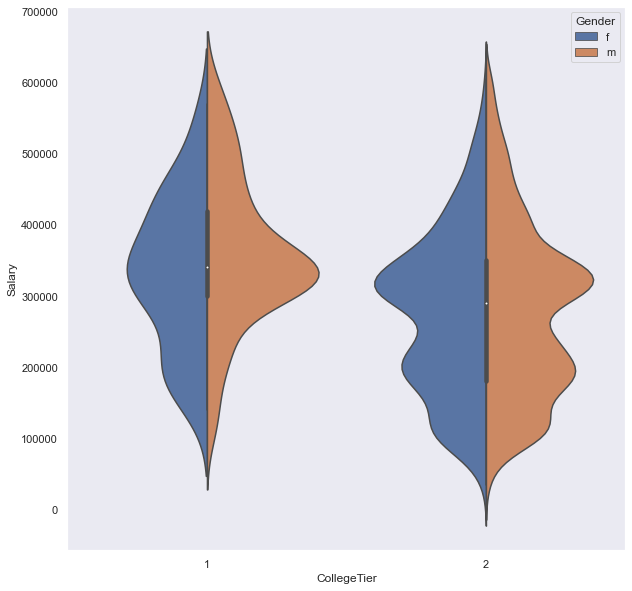

In [164]:
sns.violinplot(x='CollegeTier',y='Salary',hue='Gender',split = True,data=df_)

## Standardization and Normalization

## Finding the mean and variance

In [165]:
print(df.var())

Unnamed: 0               1.333758e+06
Salary                   1.409735e+10
10percentage             8.748789e+01
12graduation             2.651136e+00
12percentage             1.114018e+02
CollegeTier              6.157799e-02
collegeGPA               6.527513e+01
GraduationYear           1.665889e+00
English                  1.091521e+04
Logical                  7.442687e+03
Quant                    1.475778e+04
ComputerProgramming      4.178468e+04
ElectronicsAndSemicon    2.497471e+04
ComputerScience          3.113645e+04
MechanicalEngg           9.323940e+03
ElectricalEngg           7.898436e+03
TelecomEngg              1.109619e+04
CivilEngg                1.147973e+03
conscientiousness        9.733724e-01
agreeableness            8.388899e-01
extraversion             8.276931e-01
nueroticism              1.022366e+00
openess_to_experience    1.024555e+00
dtype: float64


In [166]:
print(df.mean())

Unnamed: 0                 1998.253762
Salary                   283603.420027
10percentage                 77.858501
12graduation               2008.131033
12percentage                 74.697818
CollegeTier                   1.934094
collegeGPA                   71.404362
GraduationYear             2012.646601
English                     499.959782
Logical                     500.616243
Quant                       511.160612
ComputerProgramming         351.797094
ElectronicsAndSemicon        95.414894
ComputerScience              92.533472
MechanicalEngg               22.226777
ElectricalEngg               17.015828
TelecomEngg                  32.267514
CivilEngg                     2.212766
conscientiousness            -0.024397
agreeableness                 0.145966
extraversion                  0.006525
nueroticism                  -0.164492
openess_to_experience        -0.136873
dtype: float64


### Normalization
#### Method 1

In [167]:
X_Data=df[[ 'Salary', '10percentage', '12percentage',
         'English', 'Logical', 'Quant',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg']]

In [168]:
scalar= MinMaxScaler()
scalar.fit(X_Data)
New_Data= scalar.transform(X_Data)

In [169]:
New_Data

array([[0.6754386 , 0.76311899, 0.95059625, ..., 0.        , 0.        ,
        0.        ],
       [0.81578947, 0.7834442 , 0.76660988, ..., 0.        , 0.        ,
        0.        ],
       [0.50877193, 0.77605322, 0.48040886, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.718034  , 0.43441227, ..., 0.        , 0.        ,
        0.        ],
       [0.28947368, 0.66001478, 0.50902896, ..., 0.        , 0.        ,
        0.        ],
       [0.64035088, 0.50997783, 0.4770017 , ..., 0.        , 0.        ,
        0.        ]])

#### Method 2

In [170]:
X_Data=df[[ 'Salary', '10percentage', '12percentage',
         'English', 'Logical', 'Quant',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg']]
X_Data= X_Data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [171]:
X_Data

,Salary,10percentage,12percentage,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,0.675439,0.763119,0.950596,0.482014,0.650000,0.519231,0.530321,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.815789,0.783444,0.766610,0.741007,0.691667,0.846154,0.000000,0.761827,0.000000,0.0,0.0,0.0,0.0
2,0.508772,0.776053,0.480409,0.625899,0.583333,0.320513,0.470868,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.289474,0.646711,0.646926,0.525180,0.716667,0.442308,0.000000,0.381729,0.000000,0.0,0.0,0.0,0.0
5,0.464912,0.866962,0.800681,0.546763,0.600000,0.641026,0.768133,0.000000,0.569832,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0.429825,0.167960,0.646926,0.266187,0.231667,0.455128,0.411415,0.000000,0.000000,0.0,0.0,0.0,0.0
3994,0.149123,0.646241,0.902896,0.338129,0.358333,0.532051,0.387634,0.686786,0.000000,0.0,0.0,0.0,0.0
3995,0.500000,0.718034,0.434412,0.424460,0.466667,0.442308,0.482759,0.000000,0.000000,0.0,0.0,0.0,0.0
3996,0.289474,0.660015,0.509029,0.388489,0.358333,0.256410,0.530321,0.000000,0.613128,0.0,0.0,0.0,0.0


#### Standardization

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaling=StandardScaler()
scaling.fit_transform(X_Data)

array([[ 1.14892357,  0.68876228,  1.99957474, ..., -0.20274028,
        -0.31585649, -0.09483519],
       [ 1.82279594,  0.80638062,  0.97620157, ..., -0.20274028,
        -0.31585649, -0.09483519],
       [ 0.34870014,  0.76361032, -0.61571225, ..., -0.20274028,
        -0.31585649, -0.09483519],
       ...,
       [ 0.30658312,  0.4278634 , -0.87155555, ..., -0.20274028,
        -0.31585649, -0.09483519],
       [-0.70422543,  0.09211649, -0.45652087, ..., -0.20274028,
        -0.31585649, -0.09483519],
       [ 0.98045548, -0.77612076, -0.63466361, ..., -0.20274028,
        -0.31585649, -0.09483519]])

C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prajw\anaconda3\envs\SDS\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

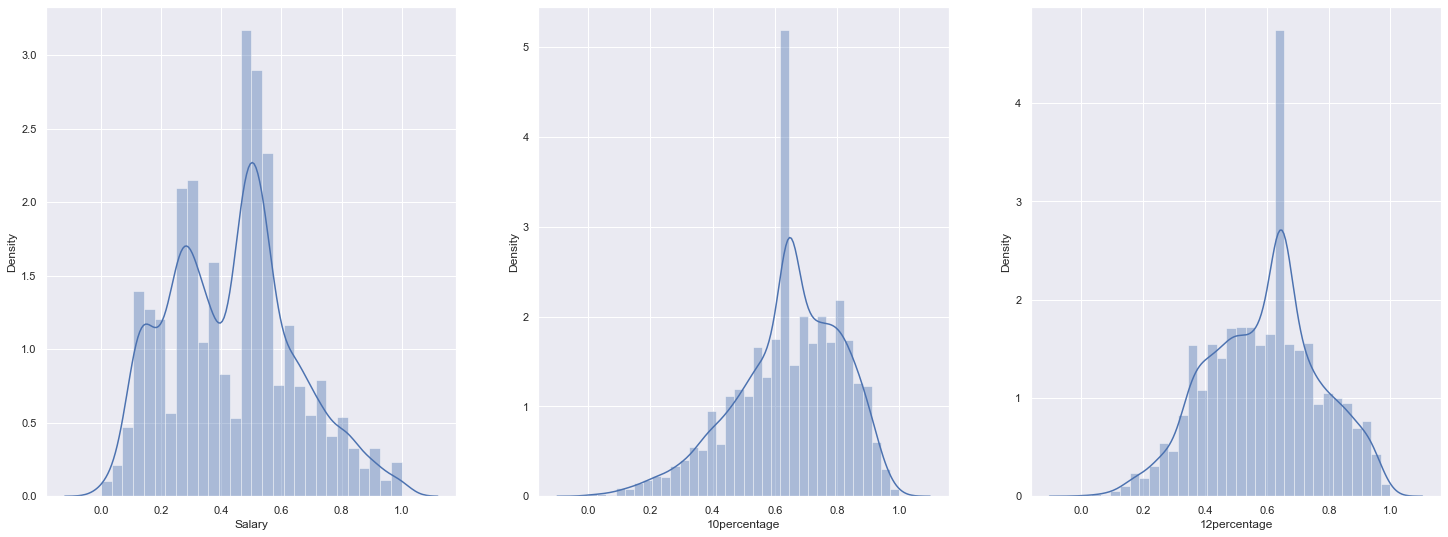

In [175]:
sns.set(rc={'figure.figsize': (25,9)})
fig, (ax1,ax2,ax3)=plt.subplots(1,3)

sns.distplot(X_Data['Salary'],ax=ax1)
sns.distplot(X_Data['10percentage'],ax=ax2)
sns.distplot(X_Data['12percentage'],ax=ax3)

# HYPOTHESIS TESTING

Testing an assumption on population parameter.
The mean score of 70 scores in Computer Programming section of the AMCAT test is 366.4 with standard deviation of 205.32. A hypothesis test is performed to check if the average scores is higher than the passing grade of 420.

## Null Hypothesis:
H0: mu <= 420

## Alternate Hypothesis:
H1: mu > 420

In [178]:
import scipy.stats as stats

data = df
sample = data['ComputerProgramming']. sample(70)
n = 70
print('Sample Size = ',n)

CS_mean = sample.mean()
print('CS Mean = ', CS_mean)

PopSD= np.std(data['ComputerProgramming']) 
print('Standard Deviation = ', PopSD)

HypMean = 420

z = (CS_mean - HypMean)/(PopSD/math.sqrt(n))
print('Z-score = ', z)

pval = stats.norm.cdf(z)

print('p-value = ', pval)

Sample Size =  70
CS Mean =  335.4
Standard Deviation =  204.38648263326954
Z-score =  -3.4631173907809685
p-value =  0.00026697769231654497


### Test the p-value for significance level of 0.05
alpha = 0.05

In [179]:
alpha = 0.05
if(pval<alpha):
    print('Null Hypothesis is rejected')
else:
    print('Null Hypothesis is plausible')

Null Hypothesis is rejected


### Check if the test is statistically significant at the 1% level
alpha = 0.01

In [180]:
alpha = 0.01
if(pval<alpha):
    print('Null Hypothesis is rejected')
else:
    print('Null Hypothesis is plausible')

Null Hypothesis is rejected


# CORRELATION MATRIX
Each cell in the correlation table represents the relation between two variables

### Studying the correlation between salary and the scores in the five main components in the AMCAT Tests(English, Quantitative, Domain, Logical) and course scores 

In [182]:
X_Data=data[[ 'Salary', 
         'English', 'Logical', 'Quant', 'ComputerProgramming', 'ElectronicsAndSemicon',
        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg']]


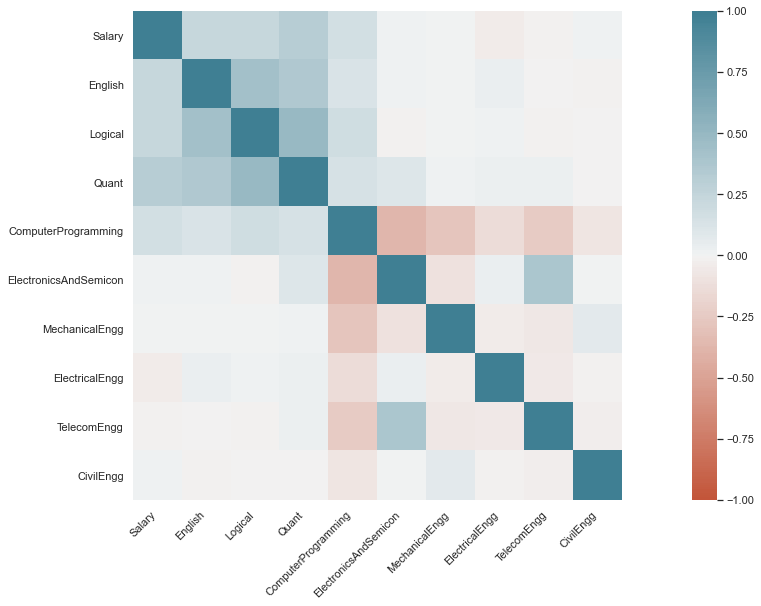

In [184]:
corrMatrix = X_Data.corr()
ax = sns.heatmap(corrMatrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);